In [40]:
# Numpy is a library for working with Arrays
import numpy as np
print "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__

# SciPy implements many different numerical algorithms
import scipy as sp
print "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__

# Pandas makes working with data tables easier
import pandas as pd
print "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__

# Module for plotting
import matplotlib
print "Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__

SyntaxError: invalid syntax (<ipython-input-40-3f139d2399f5>, line 3)

If any of these libraries are missing or out of date, you will need to [install them](https://github.com/cs109/content/wiki/Installing-Python#installing-additional-libraries) and restart IPython

## Hello matplotlib

The notebook integrates nicely with Matplotlib, the primary plotting package for python. This should embed a figure of a sine wave:

Text(0, 0.5, 'Y axis')

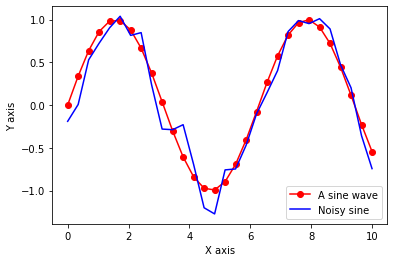

In [41]:
#this line prepares IPython for working with matplotlib
%matplotlib inline  
import numpy as np
# this actually imports matplotlib
import matplotlib.pyplot as plt  

x = np.linspace(0, 10, 30)  #array of 30 points from 0 to 10
y = np.sin(x)
z = y + np.random.normal(size=30) * .2
plt.plot(x, y, 'ro-', label='A sine wave')
plt.plot(x, z, 'b-', label='Noisy sine')
plt.legend(loc = 'lower right')
plt.xlabel("X axis")
plt.ylabel("Y axis")           

If that last cell complained about the `%matplotlib` line, you need to update IPython to v1.0, and restart the notebook. See the [installation page](https://github.com/cs109/content/wiki/Installing-Python)

## Hello Numpy

The Numpy array processing library is the basis of nearly all numerical computing in Python. Here's a 30 second crash course. For more details, consult Chapter 4 of Python for Data Analysis, or the [Numpy User's Guide](http://docs.scipy.org/doc/numpy-dev/user/index.html)

In [42]:
print("Make a 3 row x 4 column array of random numbers")
x = np.random.random((3, 4))
print(x)


print("Add 1 to every element")
x = x + 1
print(x)


print("Get the element at row 1, column 2")
print(x[1, 2])


# The colon syntax is called "slicing" the array. 
print("Get the first row")
print(x[0, :])


print("Get every 2nd column of the first row")
print(x[0, ::2])


Make a 3 row x 4 column array of random numbers
[[0.31840744 0.16156588 0.80024583 0.59872991]
 [0.96745572 0.89142911 0.47511358 0.60660191]
 [0.45719663 0.91679947 0.33450557 0.06104574]]
Add 1 to every element
[[1.31840744 1.16156588 1.80024583 1.59872991]
 [1.96745572 1.89142911 1.47511358 1.60660191]
 [1.45719663 1.91679947 1.33450557 1.06104574]]
Get the element at row 1, column 2
1.475113584240717
Get the first row
[1.31840744 1.16156588 1.80024583 1.59872991]
Get every 2nd column of the first row
[1.31840744 1.80024583]


Print the maximum, minimum, and mean of the array. This does **not** require writing a loop. In the code cell below, type `x.m<TAB>`, to find built-in operations for common array statistics like this

In [43]:
# create an array of 3 rows by 4 columns with randon numbers
x = np.random.random((3, 4))

# print x
print(x)

# find the maximum number in the array
print(np.max(x))

# find the minimum number in the array
print(np.min(x))

# find the mean of the array
print(np.mean(x))

[[0.47251612 0.58722196 0.39891838 0.13616121]
 [0.61351897 0.0497146  0.91503709 0.43163388]
 [0.14542669 0.86514968 0.05951437 0.70957604]]
0.9150370924615694
0.04971459930398525
0.4486990824634149


Call the `x.max` function again, but use the `axis` keyword to print the maximum of each row in x.

In [44]:
# create an array of 3 rows by 4 columns with randon numbers
a = np.random.random((3, 4))

# print the array
print(a)

# use the amax function with axis=1 to find max value in each row in the array
x = np.amax(a, 1)

# print the maximum values
print(x)

[[0.87961643 0.54492902 0.52662204 0.30788535]
 [0.65197926 0.18310393 0.00970603 0.47189346]
 [0.04656639 0.26770626 0.12494325 0.49075264]]
[0.87961643 0.65197926 0.49075264]


Here's a way to quickly simulate 500 coin "fair" coin tosses (where the probabily of getting Heads is 50%, or 0.5)

In [45]:
x = np.random.binomial(500, .5)
print ("number of heads:", x)

number of heads: 238


Repeat this simulation 500 times, and use the [plt.hist() function](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist) to plot a histogram of the number of Heads (1s) in each simulation

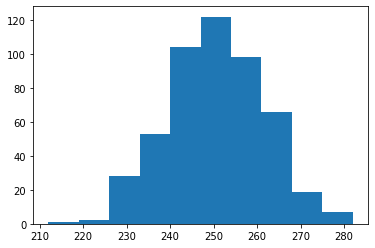

In [46]:
# create a new variable heads
heads = np.random.binomial(500, .5, size=500)

# print heads
# print(heads)

# plot a histogram with the results
histogram = plt.hist(heads, bins=10)

## The Monty Hall Problem


Here's a fun and perhaps surprising statistical riddle, and a good way to get some practice writing python functions

In a gameshow, contestants try to guess which of 3 closed doors contain a cash prize (goats are behind the other two doors). Of course, the odds of choosing the correct door are 1 in 3. As a twist, the host of the show occasionally opens a door after a contestant makes his or her choice. This door is always one of the two the contestant did not pick, and is also always one of the goat doors (note that it is always possible to do this, since there are two goat doors). At this point, the contestant has the option of keeping his or her original choice, or swtiching to the other unopened door. The question is: is there any benefit to switching doors? The answer surprises many people who haven't heard the question before.

We can answer the problem by running simulations in Python. We'll do it in several parts.

First, write a function called `simulate_prizedoor`. This function will simulate the location of the prize in many games -- see the detailed specification below:

In [47]:
"""
Function
--------
simulate_prizedoor

Generate a random array of 0s, 1s, and 2s, representing
hiding a prize between door 0, door 1, and door 2

Parameters
----------
nsim : int
    The number of simulations to run

Returns
-------
sims : array
    Random array of 0s, 1s, and 2s

Example
-------
>>> print simulate_prizedoor(3)
array([0, 0, 2])
"""
def simulate_prizedoor(nsim):
    #compute here
    return answer
#your code here
def simulate_prizedoor(nsim):
    return np.random.randint(0,3, (nsim))

Next, write a function that simulates the contestant's guesses for `nsim` simulations. Call this function `simulate_guess`. The specs:

In [48]:
"""
Function
--------
simulate_guess

Return any strategy for guessing which door a prize is behind. This
could be a random strategy, one that always guesses 2, whatever.

Parameters
----------
nsim : int
    The number of simulations to generate guesses for

Returns
-------
guesses : array
    An array of guesses. Each guess is a 0, 1, or 2

Example
-------
>>> print simulate_guess(5)
array([0, 0, 0, 0, 0])
"""
#your code here
#def simulate_guess(nsim):
#    return np.random.randint(0,3,(nsim))

def simulate_guess(nsim):
    return np.zeros(nsim, dtype=np.int)

Next, write a function, `goat_door`, to simulate randomly revealing one of the goat doors that a contestant didn't pick.

In [49]:
"""
Function
--------
goat_door

Simulate the opening of a "goat door" that doesn't contain the prize,
and is different from the contestants guess

Parameters
----------
prizedoors : array
    The door that the prize is behind in each simulation
guesses : array
    THe door that the contestant guessed in each simulation

Returns
-------
goats : array
    The goat door that is opened for each simulation. Each item is 0, 1, or 2, and is different
    from both prizedoors and guesses

Examples
--------
>>> print goat_door(np.array([0, 1, 2]), np.array([1, 1, 1]))
>>> array([2, 2, 0])
"""
#your code here
def goat_door(prizedoors, guesses):
    
    #strategy: generate random answers, and
    #keep updating until they satisfy the rule
    #that they aren't a prizedoor or a guess
    result = np.random.randint(0, 3, prizedoors.size)
    while True:
        bad = (result == prizedoors) | (result == guesses)
        if not bad.any():
            return result
        result[bad] = np.random.randint(0, 3, bad.sum())

Write a function, `switch_guess`, that represents the strategy of always switching a guess after the goat door is opened.

In [50]:
"""
Function
--------
switch_guess

The strategy that always switches a guess after the goat door is opened

Parameters
----------
guesses : array
     Array of original guesses, for each simulation
goatdoors : array
     Array of revealed goat doors for each simulation

Returns
-------
The new door after switching. Should be different from both guesses and goatdoors

Examples
--------
>>> print switch_guess(np.array([0, 1, 2]), np.array([1, 2, 1]))
>>> array([2, 0, 0])
"""
#your code here
def switch_guess(guesses, goatdoors):
    result = np.zeros(guesses.size)
    switch = {(0, 1): 2, (0, 2): 1, (1, 0): 2, (1, 2): 1, (2, 0): 1, (2, 1): 0}
    for i in [0, 1, 2]:
        for j in [0, 1, 2]:
            mask = (guesses == i) & (goatdoors == j)
            if not mask.any():
                continue
            result = np.where(mask, np.ones_like(result) * switch[(i, j)], result)
    return result

Last function: write a `win_percentage` function that takes an array of `guesses` and `prizedoors`, and returns the percent of correct guesses

In [51]:
"""
Function
--------
win_percentage

Calculate the percent of times that a simulation of guesses is correct

Parameters
-----------
guesses : array
    Guesses for each simulation
prizedoors : array
    Location of prize for each simulation

Returns
--------
percentage : number between 0 and 100
    The win percentage

Examples
---------
>>> print win_percentage(np.array([0, 1, 2]), np.array([0, 0, 0]))
33.333
"""
#your code here
def win_percentage(guesses, prizedoors):
    return 100 * (guesses == prizedoors).mean()

Now, put it together. Simulate 10000 games where contestant keeps his original guess, and 10000 games where the contestant switches his door after a  goat door is revealed. Compute the percentage of time the contestant wins under either strategy. Is one strategy better than the other?

In [39]:
#your code here
nsim = 10000

#keep guesses
print("Win percentage when keeping original door")
print(win_percentage(simulate_prizedoor(nsim), simulate_guess(nsim)))

#switch
pd = simulate_prizedoor(nsim)
guess = simulate_guess(nsim)
goats = goat_door(pd, guess)
guess = switch_guess(guess, goats)
print("Win percentage when switching doors")
print(win_percentage(pd, guess).mean())

Win percentage when keeping original door
33.95


NameError: name 'goat_door' is not defined

Many people find this answer counter-intuitive (famously, PhD mathematicians have incorrectly claimed the result must be wrong. Clearly, none of them knew Python). 

One of the best ways to build intuition about why opening a Goat door affects the odds is to re-run the experiment with 100 doors and one prize. If the game show host opens 98 goat doors after you make your initial selection, would you want to keep your first pick or switch? Can you generalize your simulation code to handle the case of `n` doors?

A solution is available at : http://jigdel.com/projects/harvardDataScience/HW0-MontyHall.html